## Homework-3: MNIST Classification with ConvNet

### **Deadline: 2020.04.07 11:59:00 AM**

### In this homework, you need to
- #### implement forward and backward for ConvLayer (`layers/conv_layer.py`)
- #### implement forward and backward for PoolingLayer (`layers/pooling_layer.py`)
- #### implement forward and backward for DropoutLayer (`layers/dropout_layer.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [1, 28, 28])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyperparameters
You can modify hyperparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate = 0.001
weight_decay = 0.005

disp_freq = 50

## Criterion and Optimizer

In [6]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [7]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [8]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][10]	 Batch [0][550]	 Training Loss 6.4679	 Accuracy 0.0900
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.6648	 Accuracy 0.2245
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.2636	 Accuracy 0.2851
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.0715	 Accuracy 0.3289
Epoch [0][10]	 Batch [200][550]	 Training Loss 1.9322	 Accuracy 0.3685
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.8216	 Accuracy 0.4031
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.7352	 Accuracy 0.4312
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.6637	 Accuracy 0.4570
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.5953	 Accuracy 0.4816
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.5381	 Accuracy 0.5027
Epoch [0][10]	 Batch [500][550]	 Training 

Epoch [8][10]	 Batch [200][550]	 Training Loss 0.3471	 Accuracy 0.9079
Epoch [8][10]	 Batch [250][550]	 Training Loss 0.3435	 Accuracy 0.9087
Epoch [8][10]	 Batch [300][550]	 Training Loss 0.3452	 Accuracy 0.9077
Epoch [8][10]	 Batch [350][550]	 Training Loss 0.3473	 Accuracy 0.9063
Epoch [8][10]	 Batch [400][550]	 Training Loss 0.3466	 Accuracy 0.9067
Epoch [8][10]	 Batch [450][550]	 Training Loss 0.3461	 Accuracy 0.9073
Epoch [8][10]	 Batch [500][550]	 Training Loss 0.3469	 Accuracy 0.9068

Epoch [8]	 Average training loss 0.3460	 Average training accuracy 0.9071
Epoch [8]	 Average validation loss 0.2719	 Average validation accuracy 0.9298

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.3252	 Accuracy 0.9500
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.3145	 Accuracy 0.9202
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.3226	 Accuracy 0.9168
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.3329	 Accuracy 0.9138
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.3303	 Accuracy 0.91

In [9]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9197.



## Plot

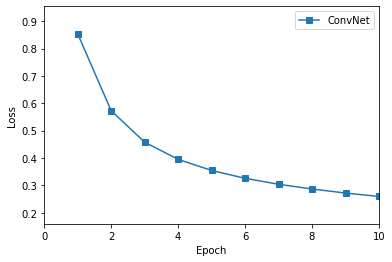

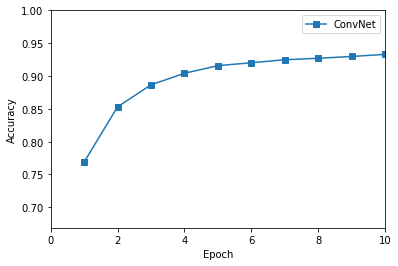

In [10]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements (4):**
### **You need to implement the Dropout layer and train the network again.**

In [5]:
# Hyperparameters
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate = 0.001
weight_decay = 0

disp_freq = 50

In [6]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer, DropoutLayer

# build your network
convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
#convNet.add(DropoutLayer(0.1))
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
#convNet.add(DropoutLayer(0.1))
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(DropoutLayer(0.2))
convNet.add(FCLayer(128, 10))

In [7]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

# Set Criterion and Optimizer
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

In [8]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][10]	 Batch [0][550]	 Training Loss 12.8416	 Accuracy 0.1300
Epoch [0][10]	 Batch [50][550]	 Training Loss 4.0405	 Accuracy 0.2525
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.8695	 Accuracy 0.3567
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.3915	 Accuracy 0.4154
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.1039	 Accuracy 0.4594
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.9078	 Accuracy 0.4944
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.7622	 Accuracy 0.5221
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.6519	 Accuracy 0.5437
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.5605	 Accuracy 0.5637
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.4858	 Accuracy 0.5794
Epoch [0][10]	 Batch [500][550]	 Training

Epoch [8][10]	 Batch [200][550]	 Training Loss 0.3553	 Accuracy 0.8928
Epoch [8][10]	 Batch [250][550]	 Training Loss 0.3542	 Accuracy 0.8927
Epoch [8][10]	 Batch [300][550]	 Training Loss 0.3550	 Accuracy 0.8918
Epoch [8][10]	 Batch [350][550]	 Training Loss 0.3552	 Accuracy 0.8922
Epoch [8][10]	 Batch [400][550]	 Training Loss 0.3529	 Accuracy 0.8928
Epoch [8][10]	 Batch [450][550]	 Training Loss 0.3526	 Accuracy 0.8929
Epoch [8][10]	 Batch [500][550]	 Training Loss 0.3525	 Accuracy 0.8930

Epoch [8]	 Average training loss 0.3522	 Average training accuracy 0.8929
Epoch [8]	 Average validation loss 0.2818	 Average validation accuracy 0.9150

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.4018	 Accuracy 0.9100
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.3191	 Accuracy 0.9053
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.3355	 Accuracy 0.9005
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.3393	 Accuracy 0.8985
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.3389	 Accuracy 0.89

In [9]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9305.



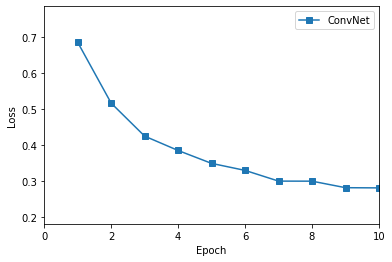

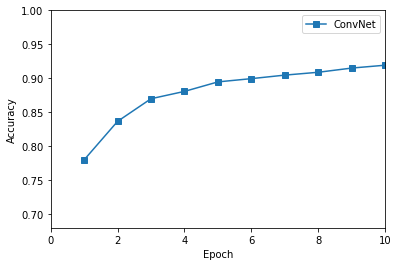

In [10]:
# Plot
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})